# Aula 5 - Modelagem de Tópicos com Latent Dirichlet Allocation (LDA)
### Prof. Dr. Ahirton Lopes

#### Demo 7 - Algoritmo LDA - Aprendendo Modelagem de Tópicos com "O Mágico de Oz"


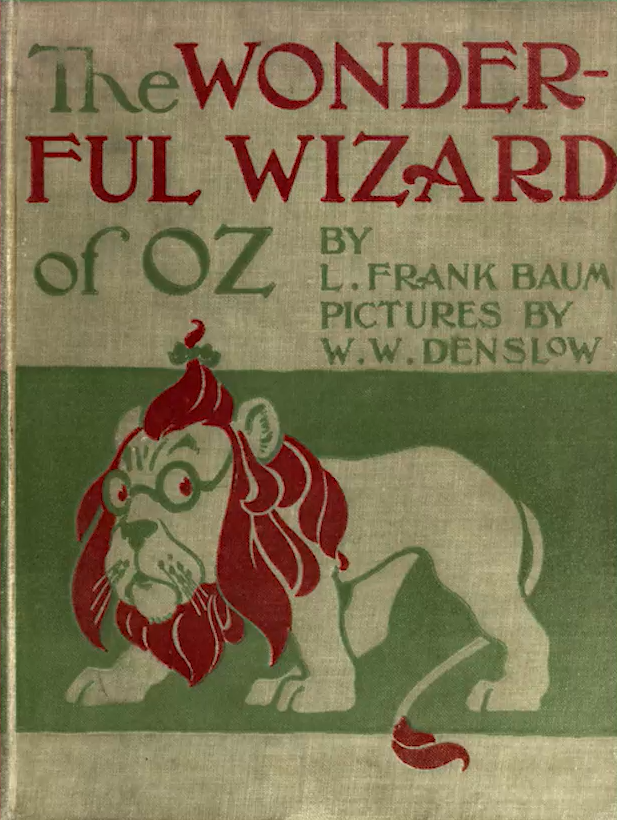

The Wonderful Wizard of Oz. Acesso via [https://www.gutenberg.org/ebooks/55](https://www.gutenberg.org/ebooks/55)

Em nossa aula de número 5 apresentei o que é o problema de "Modelagem de Tópicos" e como as técnicas nesse campo podem ser utilizadas para solução de problemas do mundo real.

Modelagem de Tópicos tem sido a estratégia principal nos últimos anos para o problema de descoberta de tópicos a partir de um grande *corpus* textual.

Vamos começar entendendo mais detalhes do nosso problema: Quais são os tópicos? Como eles são definidos? Nós definimos ou o computador? O que é um corpus grande? Quantos documentos precisamos?

Vamos começar com um *grande corpus de documentos de texto*. Normalmente, teríamos dois documentos 📄, cinco documentos 📄, dez milhões de documentos 📄, os quais podem ser considerados nosso corpus. Sim, até mesmo 1 documento 📄 pode ser usado para modelagem de tópicos. Portanto, definir um *grande corpus de documentos de texto* pode ser subjetivo.

Neste notebook você terá uma experiência com o algoritmo LDA (*Latent Dirichlet Allocation*).

## O que é o Latent Dirichlet Allocation (LDA)?
LDA é um modelo de Aprendizado Não Supervisionado.

::: {observação}
### Modelagem de tópicos a partir de documentos 📄

- **Aprendizado Supervisionado** - Nossos documentos 📄 são pré-etiquetados com o(s) tema(s) indicado(s). Podemos então treinar 🏋️‍♂️ e testar (e também, você pode incluir a validação). **Geralmente** isso é dividido:
  - treinamento 80%
  - testes 20%.

- **Aprendizado Não Supervisionado** - Os dados não são rotulados. Portanto, não temos ideia de quais são os tópicos de antemão. Dito isto, podemos (e iremos) definir o *número de tópicos*.

Então, voltando às nossas perguntas originais:

- **Quais são os tópicos?**
  - Os tópicos terão um número X de conjuntos de termos (definimos este X) que terão (poderão) ter um tema comum.

- **Como eles são definidos?**
  - É a isso que chegaremos neste *notebook*.

- **Nós definimos ou o computador?**
  - O LDA não é supervisionado, por isso definimos a quantidade de tópicos. O computador fornece os próprios tópicos.

- **O que é um corpus grande? E Quantos documentos precisamos?**
  - Um pouco subjetivo aqui. Há uma *ótima* discussão sobre isso por Tang et al. [tang2014understanding](https://proceedings.mlr.press/v32/tang14.html) em relação a isso. Se você tiver oportunidade, leia todos os pontos, mas para resumir:
    - O número de documentos é importante, mas em algum momento, aumentar o número não garante melhores resultados. Mesmo a amostragem de 1.000 artigos de 1.000.000 de artigos poderia resultar nos mesmos, se não melhores, resultados do que 1.000.000 de documentos.
    - O tamanho dos documentos também desempenha um papel importante, portanto, os documentos não devem ser curtos. Documentos maiores podem ser amostrados e receber novamente o mesmo resultado desejado.

Ref: https://proceedings.mlr.press/v32/tang14.html

Uma das melhores representações do que é LDA e como utilizá-lo pode ser encontrada no trabalho de Blei *Modelos de tópicos probabilísticos*.


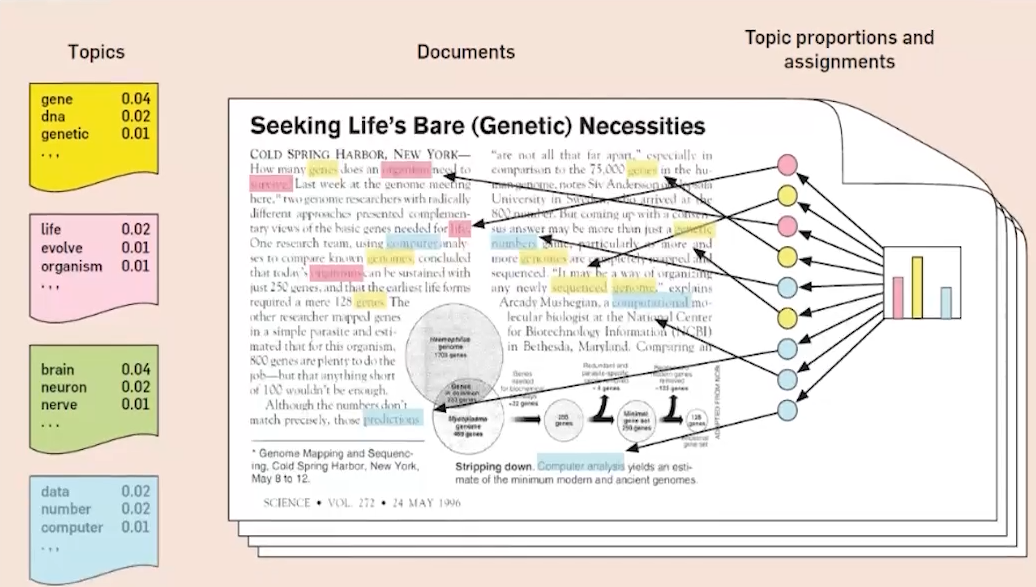

"Figura 1. As intuições por trás da alocação latente de Dirichlet. Assumimos que existe um certo número de "tópicos", que são distribuições sobre palavras, para toda a coleção (extrema esquerda). Supõe-se que cada documento seja gerado da seguinte forma. Primeiro escolha uma distribuição pelos tópicos (o histograma à direita); então, para cada palavra, escolha uma atribuição de tópico (as moedas coloridas) e escolha a palavra do tópico correspondente. Os tópicos e as atribuições de tópico nesta figura são ilustrativos – eles não são adequados a partir de dados reais." 
{cite:p}blei2012probabilistic (Página 3)


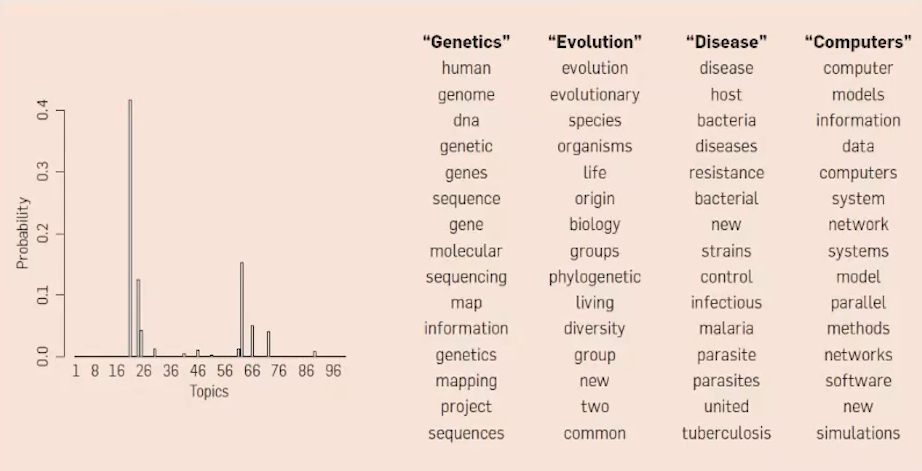

"Figura 2. Inferência real com LDA. Ajustamos um modelo LDA de 100 tópicos a 17.000 artigos da revista Science. À esquerda estão as proporções de tópicos inferidas para o artigo de exemplo na Figura 1. À direita estão as 15 palavras mais frequentes dos tópicos mais frequentes encontrados neste artigo. {cite:p} blei2012probabilistic (Página 4)"

Ref: [https://www.cs.columbia.edu/~blei/papers/Blei2012.pdf](https://www.cs.columbia.edu/~blei/papers/Blei2012.pdf)


## Hands on: Vamos testar um exemplo?

Para nosso exemplo, usaremos um subconjunto de livros de L. Frank Baum que fazem parte de domínio público.

- O Maravilhoso Mágico de Oz  
  [https://www.gutenberg.org/files/55/55-h/55-h.htm](https://www.gutenberg.org/files/55/55-h/55-h.htm)
  
- A Maravilhosa Terra de Oz  
  [https://www.gutenberg.org/files/54/54-h/54-h.htm](https://www.gutenberg.org/files/54/54-h/54-h.htm)
  
- Ozma de Oz  
  [https://www.gutenberg.org/files/33361/33361-h/33361-h.htm](https://www.gutenberg.org/files/33361/33361-h/33361-h.htm)
  
- Dorothy e o Mágico de Oz  
  [https://www.gutenberg.org/files/22566/22566-h/22566-h.htm](https://www.gutenberg.org/files/22566/22566-h/22566-h.htm)
  
- O caminho para Oz  
  [https://www.gutenberg.org/files/26624/26624-h/26624-h.htm#](https://www.gutenberg.org/files/26624/26624-h/26624-h.htm#)

Os livros são todos de domínio público e o HTML pode ser encontrado em [https://www.gutenberg.org/](https://www.gutenberg.org/). Veremos um exemplo de como obter o texto do livro usando Python. Observe que esta não será a maneira ideal de fazer isso, mas esperamos poder deixar o processo claro para você tentar com outros livros ou manuscritos.


### Obtenha o HTML do livro

#### Usaremos duas bibliotecas para isso; um é chamado de padrão para Python

In [4]:
!pip install urllib3
import urllib

A outra é uma das nossas favoritas, chamada BeautifulSoup{cite:p} BeautifulSoup

###### da importação bs4 BeautifulSoup

urllib obterá o documento e o BeautifulSoup facilitará a análise.

Ref: [https://beautiful-soup-4.readthedocs.io/en/latest/](https://beautiful-soup-4.readthedocs.io/en/latest/)


In [6]:
!pip install bs4

In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.gutenberg.org/files/55/55-h/55-h.htm"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")


Aqui removemos qualquer CSS (estilo) ou JavaScript (script)

In [8]:
for script in soup(["script", "style"]):
    script.extract()

Por fim, pegue o texto e adicione-o à nossa lista de documentos.

In [9]:
text = soup.get_text()
documents = []
documents.append(text)

Repetiremos esse processo para os outros quatro livros.

In [10]:
url = "https://www.gutenberg.org/files/54/54-h/54-h.htm"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = "https://www.gutenberg.org/files/33361/33361-h/33361-h.htm"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = "https://www.gutenberg.org/files/22566/22566-h/22566-h.htm"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = "https://www.gutenberg.org/files/26624/26624-h/26624-h.htm"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.extract()
text = soup.get_text()
documents.append(text)


## Criando Tokens e Vocabulário

Agora que temos nossos livros, precisamos tokenizar as histórias por palavra e então criar um vocabulário a partir desses tokens. sklearn é uma biblioteca fantástica que usaremos em todo o notebook `sklearn_api`.


In [11]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
df = cv.fit_transform(documents)
vocab = cv.get_feature_names_out()

Vamos dar uma olhada nos tokens e no número de ocorrência dos tokens.

In [14]:
print(df[0])

  (np.int32(0), np.int32(8066))	3198
  (np.int32(0), np.int32(6151))	89
  (np.int32(0), np.int32(3798))	99
  (np.int32(0), np.int32(2713))	14
  (np.int32(0), np.int32(5457))	976
  (np.int32(0), np.int32(8999))	28
  (np.int32(0), np.int32(8980))	44
  (np.int32(0), np.int32(5592))	169
  (np.int32(0), np.int32(1343))	119
  (np.int32(0), np.int32(3399))	5
  (np.int32(0), np.int32(892))	5
  (np.int32(0), np.int32(8099))	196
  (np.int32(0), np.int32(4376))	284
  (np.int32(0), np.int32(3329))	354
  (np.int32(0), np.int32(8578))	28
  (np.int32(0), np.int32(592))	18
  (np.int32(0), np.int32(595))	4
  (np.int32(0), np.int32(4215))	544
  (np.int32(0), np.int32(8506))	15
  (np.int32(0), np.int32(7633))	19
  (np.int32(0), np.int32(550))	1738
  (np.int32(0), np.int32(5167))	24
  (np.int32(0), np.int32(5544))	65
  (np.int32(0), np.int32(5663))	2
  (np.int32(0), np.int32(9032))	19
  :	:
  (np.int32(0), np.int32(5608))	1
  (np.int32(0), np.int32(2547))	1
  (np.int32(0), np.int32(5047))	1
  (np.int32(0)

O segundo número listado é o número do token, e usamos a lista de vocabulário para ver qual é a palavra real. Um exemplo seria olhar para a primeira linha.


In [15]:
print(vocab[8066])

the


Não é de surpreender que a palavra "the" seja usada tantas vezes.

::: {observação}

Porque existem muitos termos comumente usados. Gostaríamos de remover essas palavras de nosso conjunto de dados. Essas palavras são chamadas de stopwords e devem ser removidas.

A partir daqui, estamos no ponto em que podemos executar o LDA.

Existem muito mais do que dois insumos disponíveis para LDA, mas focaremos em dois.

Aqui estão as outras entradas: [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

Os dois em que nos concentraremos são:

Os dois em que nos concentraremos são:
- `n_components` - o número de tópicos, novamente, precisamos especificar isso.
- `doc_topic_prior` - relaciona a distribuição do Dirichlet (o próximo bloco de notas fornece detalhes completos sobre o Dirichlet e como ele se relaciona com o LDA).



In [16]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=4, doc_topic_prior=1)
lda.fit(df)

LatentDirichletAllocation(doc_topic_prior=1, n_components=4)

Imprimindo as 5 primeiras palavras por tópico

In [17]:
import numpy as np
topic_words = {}
n_top_words = 10

for topic, comp in enumerate(lda.components_):
    # para o array ndimensional "arr":
    # argsort() retorna um array n-dimensional classificado de arr, chame-o de "ranked_array"
    # que contém os índices que classificariam arr de forma decrescente
    # para o i-ésimo elemento em rank_array, rank_array[i] representa o índice do
    # elemento em arr que deve estar no i-ésimo índice em rank_array
    # ex. arr = [3,7,1,0,3,6]
    # np.argsort(arr) -> [3, 2, 0, 4, 5, 1]
    # word_idx contém os índices em "tópico" das principais num_top_words mais relevantes
    # para um determinado tópico ... ele é classificado em ordem crescente no início e depois invertido (desc. agora)
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # armazena as palavras mais relevantes para o tópico
    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print('Topic %d' % topic)
    print(' %s ' % ' , '.join(words))


Topic 0
 limping , passages , chased , unlock , clump , curtsy , solemnly , cruelty , incidents , afterwards 
Topic 1
 limping , passages , chased , unlock , clump , curtsy , solemnly , cruelty , incidents , afterwards 
Topic 2
 the , and , to , of , in , you , it , he , that , was 
Topic 3
 the , and , to , of , in , you , was , it , that , he 


Olhando para isso, não temos uma imagem clara dos tópicos.

Agora vamos remover essas palavras irrelevantes e ver como pode ser importante 🧼 limpar os dados 🧼!


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

podemos adicionar isso à etapa de tokenização

In [20]:
cv = CountVectorizer(stop_words='english')
df = cv.fit_transform(documents)
vocab = cv.get_feature_names_out()

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=4, doc_topic_prior=1)
lda.fit(df)

LatentDirichletAllocation(doc_topic_prior=1, n_components=4)

In [22]:
import numpy as np
topic_words = {}
n_top_words = 10

for topic, comp in enumerate(lda.components_):
    # para o array ndimensional "arr":
    # argsort() retorna um array n-dimensional classificado de arr, chame-o de "ranked_array"
    # que contém os índices que classificariam arr de forma decrescente
    # para o i-ésimo elemento em rank_array, rank_array[i] representa o índice do
    # elemento em arr que deve estar no i-ésimo índice em rank_array
    # ex. arr = [3,7,1,0,3,6]
    # np.argsort(arr) -> [3, 2, 0, 4, 5, 1]
    # word_idx contém os índices em "tópico" das principais num_top_words mais relevantes
    # para um determinado tópico ... ele é classificado em ordem crescente no início e depois invertido (desc. agora)
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # armazena as palavras mais relevantes para o tópico
    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print('Topic %d' % topic)
    print(' %s ' % ' , '.join(words))

Topic 0
 dorothy , said , pg , king , ozma , billina , hen , little , scarecrow , girl 
Topic 1
 said , dorothy , scarecrow , man , woodman , tin , little , asked , oz , tip 
Topic 2
 said , wizard , dorothy , pg , jim , little , zeb , horse , eureka , asked 
Topic 3
 victory , struggled , amusement , squeeze , supplied , 21 , radiance , 23 , fountains , confined 
